**Import Libraries**

In [44]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

**Original Image**

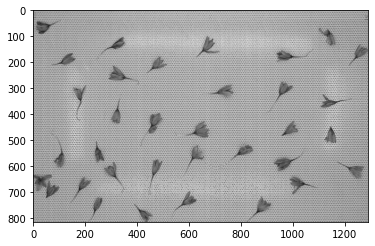

In [45]:
original_image = cv2.imread("/content/img_01.jpg",0)
plt.imshow(original_image,"gray")
plt.show()

**Image FFT**

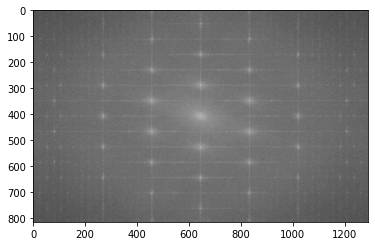

In [46]:
f_shift=np.fft.fftshift(np.fft.fft2(original_image))
plt.imshow(np.log(abs(f_shift)),"gray")
plt.show()

**Remove Noisy Regions**

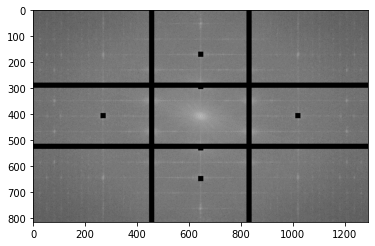

In [47]:
f_shift[160:180,636:656] = 1
f_shift[284:304,636:656] = 1
f_shift[520:540,636:656] = 1
f_shift[638:658,636:656] = 1

f_shift[:,822:842] = 1
f_shift[279:299, :] = 1
f_shift[514:534, :] = 1
f_shift[:,447:467] = 1

f_shift[396:416, 260:280] = 1
f_shift[396:416, 1010:1030] = 1

plt.imshow(np.log(abs(f_shift)),"gray")
plt.show()

**Denoied Image**

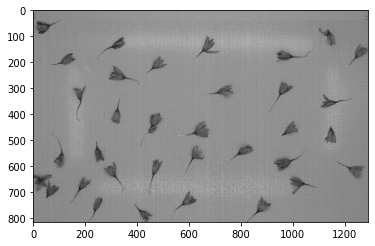

In [48]:
denoised = np.fft.ifftshift(f_shift)
denoised = np.fft.ifft2(denoised)
plt.imshow(abs(denoised),"gray")
plt.show()

**Saving Denoised Image**

In [49]:
cv2.imwrite("denoised.jpg", abs(denoised))

True

**Applying Canny**

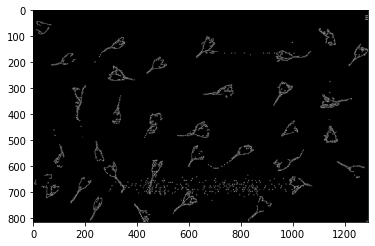

In [50]:
original_image = cv2.imread("/content/denoised.jpg",0)
edge_detect = cv2.Canny(original_image, 150, 400)
plt.imshow(edge_detect,"gray")
plt.show()

**Gradiant of Image**

In [8]:
v_sobel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype='float64')

h_sobel = np.array([
    [-1, 0, 1],
    [-2, 0 ,2],
    [-1, 0, 1],
], dtype='float64')

**Horizontal derivative**

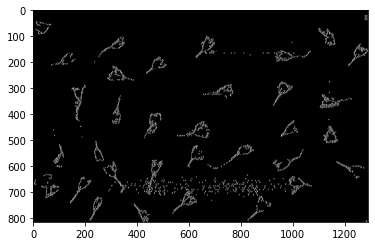

In [57]:
im_h = cv2.filter2D(edge_detect, ddepth=-1, kernel=h_sobel)
plt.imshow(im_h,"gray")
plt.show()

**Vertical derivative**

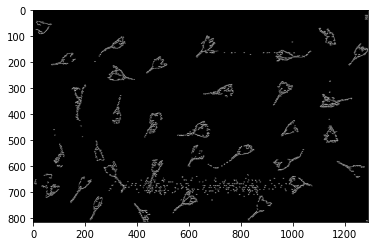

In [58]:
im_v = cv2.filter2D(edge_detect, ddepth=-1, kernel=v_sobel)
plt.imshow(im_v,"gray")
plt.show()

**Gradiant**

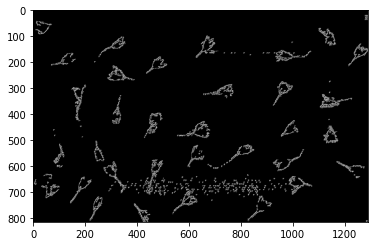

In [59]:
gradiant = np.power(im_h, 2) + np.power(im_v, 2)
gradiant = gradiant.astype('float64')
gradiant = np.sqrt(gradiant)
plt.imshow(gradiant,"gray")
plt.show()

**Gradiant Direction**

In [60]:
arctan = np.arctan2(im_v, im_h)
arctan

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [61]:
np.where(arctan > 0)

(array([ 19,  19,  19, ..., 813, 813, 813]),
 array([1278, 1279, 1280, ...,  434,  442,  443]))

In [62]:
np.where(arctan < 0)

(array([], dtype=int64), array([], dtype=int64))

# Q2

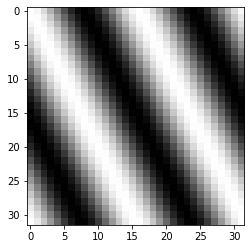

In [15]:
arr1 = np.zeros((32, 32))
arr1[31, 2] = 1
f_shift=np.fft.fft2(arr1)
plt.imshow(np.real(f_shift),"gray")
plt.show()

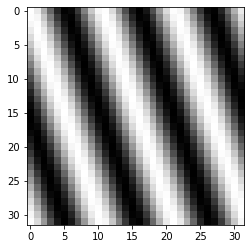

In [33]:
arr1 = np.zeros((32, 32))
arr1[31, 3] = 1
f_shift=np.fft.fft2(arr1)
plt.imshow(np.real(f_shift),"gray")
plt.show()

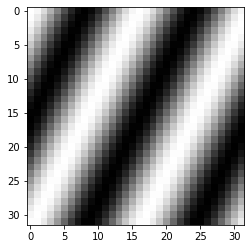

In [32]:
arr1 = np.zeros((32, 32))
arr1[31, 30] = 1
f_shift=np.fft.fft2(arr1)
plt.imshow(np.real(f_shift),"gray")
plt.show()

# Q3

In [ ]:
np_arr = np.zeros((5, 5))
np_arr[:,3] = 1
np_arr[:,4] = 1
np_arr

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

**Sobel operators**

In [ ]:
v_sobel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype='float64')

h_sobel = np.array([
    [-1, 0, 1],
    [-2, 0 ,2],
    [-1, 0, 1],
], dtype='float64')

**Horizontal**

In [ ]:
np_h = cv2.filter2D(np_arr, ddepth=-1, kernel=h_sobel)
np_h

array([[0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.]])

**Vertical**

In [ ]:
np_v = cv2.filter2D(np_arr, ddepth=-1, kernel=v_sobel)
np_v

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

**Gradiant**

In [ ]:
gradiant = np.power(np_h, 2) + np.power(np_v, 2)
gradiant = gradiant.astype('float64')
gradiant = np.sqrt(gradiant)
gradiant

array([[0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.],
       [0., 0., 4., 4., 0.]])

# Q4

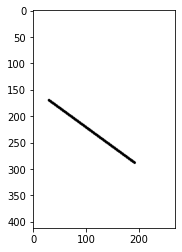

In [36]:
original_image = cv2.imread("/content/img_02.jpg",0)
plt.imshow(original_image,"gray")
plt.show()

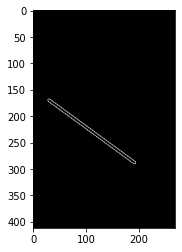

In [37]:
edge_detect = cv2.Canny(original_image, 250, 300)
plt.imshow(edge_detect,"gray")
plt.show()

In [38]:
x_edge, y_edge = np.where(edge_detect > 0)[1] , -np.where(edge_detect > 0)[0] + edge_detect.shape[0]
x_mean, y_mean = np.mean(x_edge), np.mean(y_edge)
xy_mean = np.mean(x_edge * y_edge)
x2_mean , xmean_2 = np.mean(np.power(x_edge, 2)), np.power(x_mean, 2)

In [39]:
m = ((x_mean * y_mean) - xy_mean ) / (xmean_2 - x2_mean)
m 

-0.7260330441850827

In [40]:
c = y_mean - m * x_mean
c

263.5842782217144